In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings
warnings.filterwarnings('ignore')
import matplotlib.style as style
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
style.available
style.use('ggplot')

plt.rcParams['figure.figsize'] = [10, 6]

/Users/efumagal/.pyenv/versions/3.8.0/lib/python3.8/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
operations_df = pd.read_csv('all.csv')
operations_df['date'] = operations_df['date'].astype('datetime64[ns]')

In [3]:
operations_df.isnull().sum()

date        0
westerly    0
easterly    0
dtype: int64

In [4]:
print(f">> Data Available since {operations_df.date.min()} up to {operations_df.date.max()}")

>> Data Available since 2012-01-01 00:00:00 up to 2021-04-30 00:00:00


In [5]:
print(f"Number days on westerly {np.sum(operations_df['westerly'] >= 0.5)}/{len(operations_df)}")

Number days on westerly 2440/3408


In [6]:
percentage_westerly = round(operations_df["westerly"].mean() * 100)
print(f"Total percentage of westerly operations {percentage_westerly}%")

Total percentage of westerly operations 71.0%


In [7]:
percentage_easterly = round(operations_df["easterly"].mean() * 100)
print(f"Total percentage of easterly operations {percentage_easterly}%")

Total percentage of easterly operations 29.0%


In [8]:
operations_df['month'] = operations_df.date.dt.month
operations_df['year'] = operations_df.date.dt.year
operations_df['day'] = operations_df.date.dt.day
operations_df['weekdayName'] = operations_df.date.dt.day_name()
operations_df['weekday'] = operations_df.date.dt.weekday
operations_df['week'] = operations_df.date.dt.week
operations_df['weekend'] = operations_df.date.dt.weekday // 5 == 1


In [9]:
import matplotlib.colors as colors
def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])
    return colors.LinearSegmentedColormap('CustomMap', cdict)

c = colors.ColorConverter().to_rgb
rvb = make_colormap([c('purple'), c('red'), 0.45, c('red'), c('yellow'), 0.65, c('yellow'), c('green'), 0.90, c('green')])

In [10]:
def plot_heatmap(df):
    plt.figure(figsize = (14, 10))

    ax = sns.heatmap(df, cmap = rvb, annot=True, fmt='.0%', vmin=0, vmax=1, 
    linewidths=.5, annot_kws={"size": 18})
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, .25, .50,.75, 1])
    cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 14)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 14)
    ax.tick_params(rotation = 0)
    plt.title('Westerley Operations', fontdict={'fontsize':18})

In [11]:
ops_month_year_df = pd.pivot_table(operations_df, values="westerly",index=["month"], columns=["year"], fill_value = None, margins = True)
ops_month_year_df = ops_month_year_df.set_index([[calendar.month_abbr[i] if isinstance(i, int) else i for i in list(ops_month_year_df.index)]])

In [12]:
ops_month_year_df

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,All
Jan,0.759452,0.635935,0.818032,0.890387,0.772161,0.630129,0.755774,0.888968,0.921452,0.695032,0.776732
Feb,0.690103,0.465000,0.881000,0.704536,0.773966,0.654786,0.588250,0.821357,0.949483,0.579607,0.711802
Mar,0.627806,0.217129,0.610645,0.613226,0.622226,0.787032,0.446774,0.947581,0.524000,0.742290,0.613871
Apr,0.668000,0.559333,0.551633,0.525967,0.760100,0.853467,0.614033,0.231133,0.332533,0.399300,0.549550
May,0.577742,0.748194,0.649097,0.818581,0.506452,0.548839,0.370903,0.771645,0.540355,NaN,0.614645
Jun,0.601667,0.628333,0.588400,0.724233,0.684000,0.822367,0.523533,0.587833,0.698100,NaN,0.650941
Jul,0.887226,0.570129,0.733516,0.856323,0.965226,0.809226,0.720710,0.742161,0.978065,NaN,0.806953
Aug,0.879613,0.851903,0.884226,0.727806,0.754161,0.894226,0.946548,0.934710,0.677290,NaN,0.838943
Sep,0.891433,0.761367,0.471067,0.582233,0.851467,0.827733,0.759133,0.802900,0.775833,NaN,0.747019
Oct,0.630194,0.772323,0.858871,0.402355,0.422290,0.923484,0.711032,0.704032,0.818323,NaN,0.693656


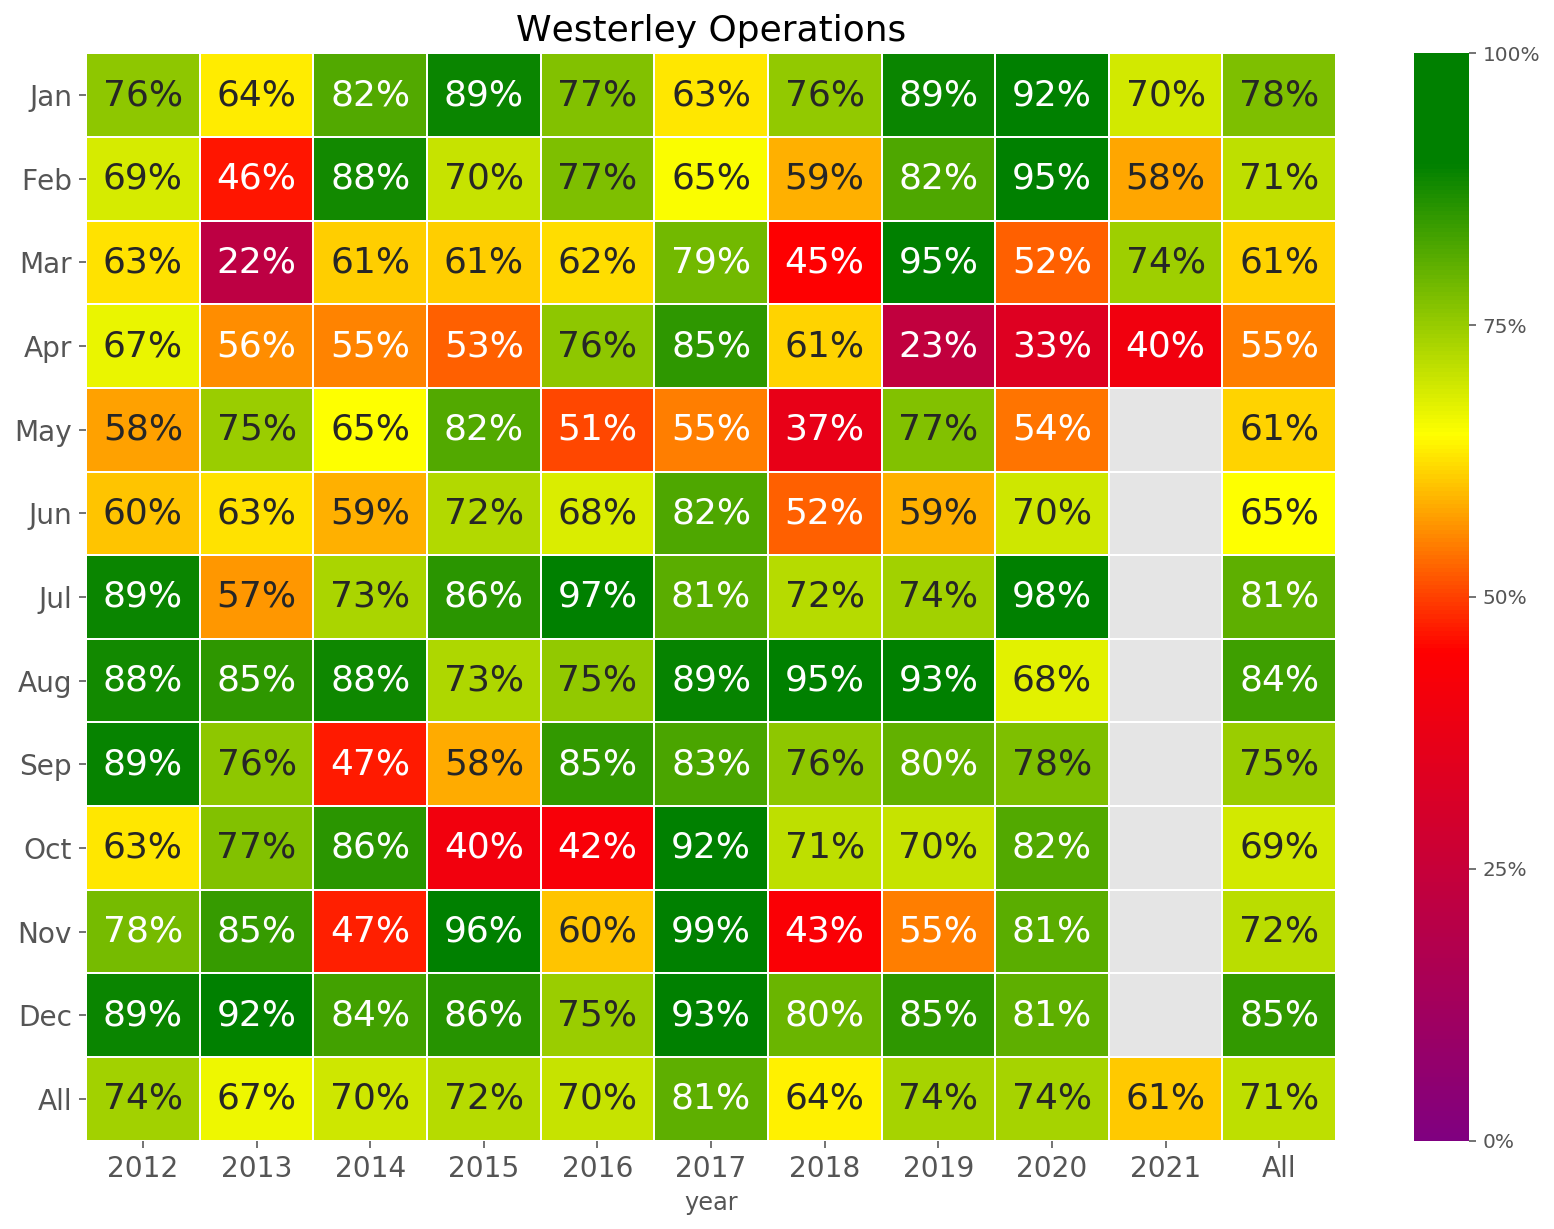

In [13]:
plot_heatmap(ops_month_year_df)

In [14]:
ops_weekday_year_df = pd.pivot_table(operations_df, values="westerly",index=["weekday"], columns=["year"], fill_value=0.5)
ops_weekday_year_df = ops_weekday_year_df.set_index([[calendar.day_name[i] for i in list(ops_weekday_year_df.index)]])

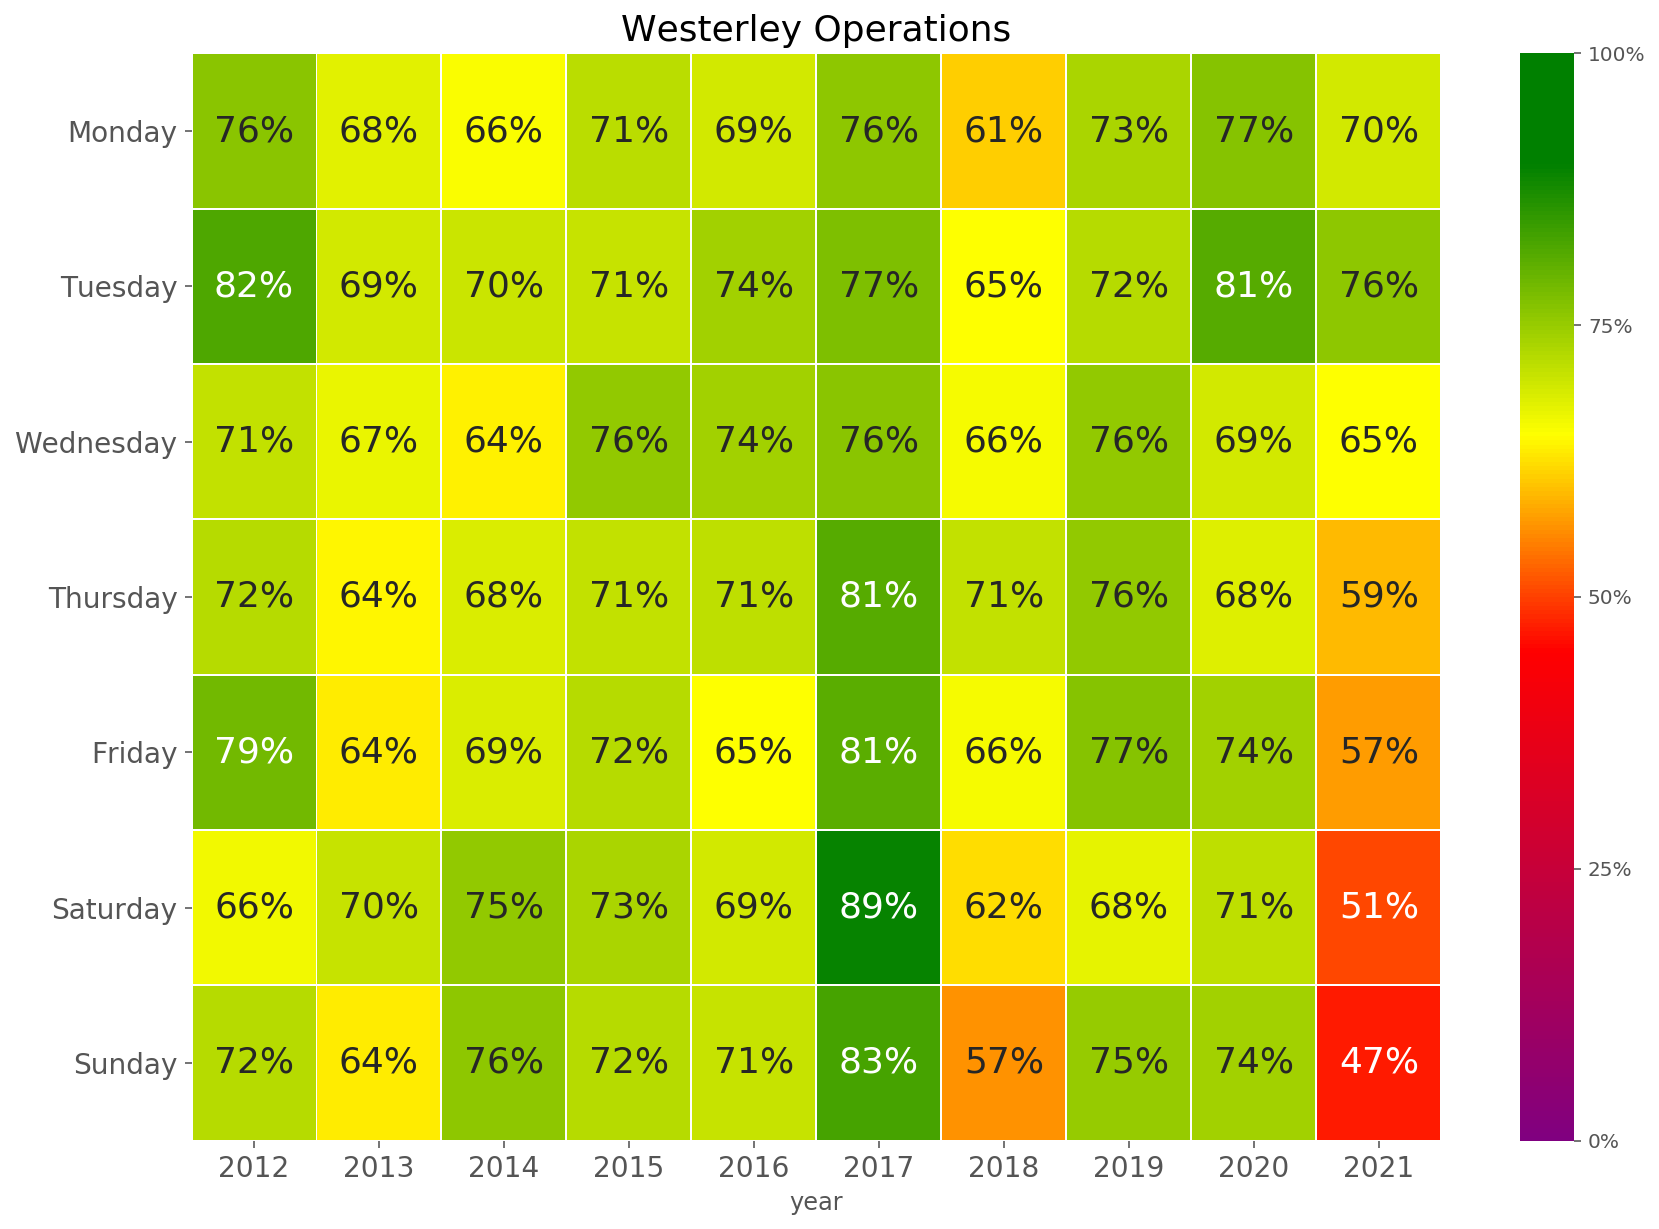

In [15]:
plot_heatmap(ops_weekday_year_df)

In [16]:
def plot_heatmap_year(year):
    plt.figure(figsize = (16, 10))
    ops_year_df = operations_df.loc[operations_df['year'] == year]
    ops_year_df = pd.pivot_table(ops_year_df, values="westerly",index=["month"], columns=["day"], fill_value=None)
    ops_year_df = ops_year_df.set_index([[calendar.month_abbr[i] for i in list(ops_year_df.index)]])
    ax = sns.heatmap(ops_year_df, cmap = 'RdYlGn', annot=False, fmt='.0%', vmin=0, vmax=1, linewidths=.1,
                     annot_kws={"size": 8}, square=True, cbar_kws={"shrink": .48, 'label': 'Westerly percentage'})
    ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 12)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
    ax.tick_params(rotation = 0)
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([0, .25, .50,.75, 1])
    cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
    plt.title(f'Operations {year}', fontdict={'fontsize':18}, pad=14);

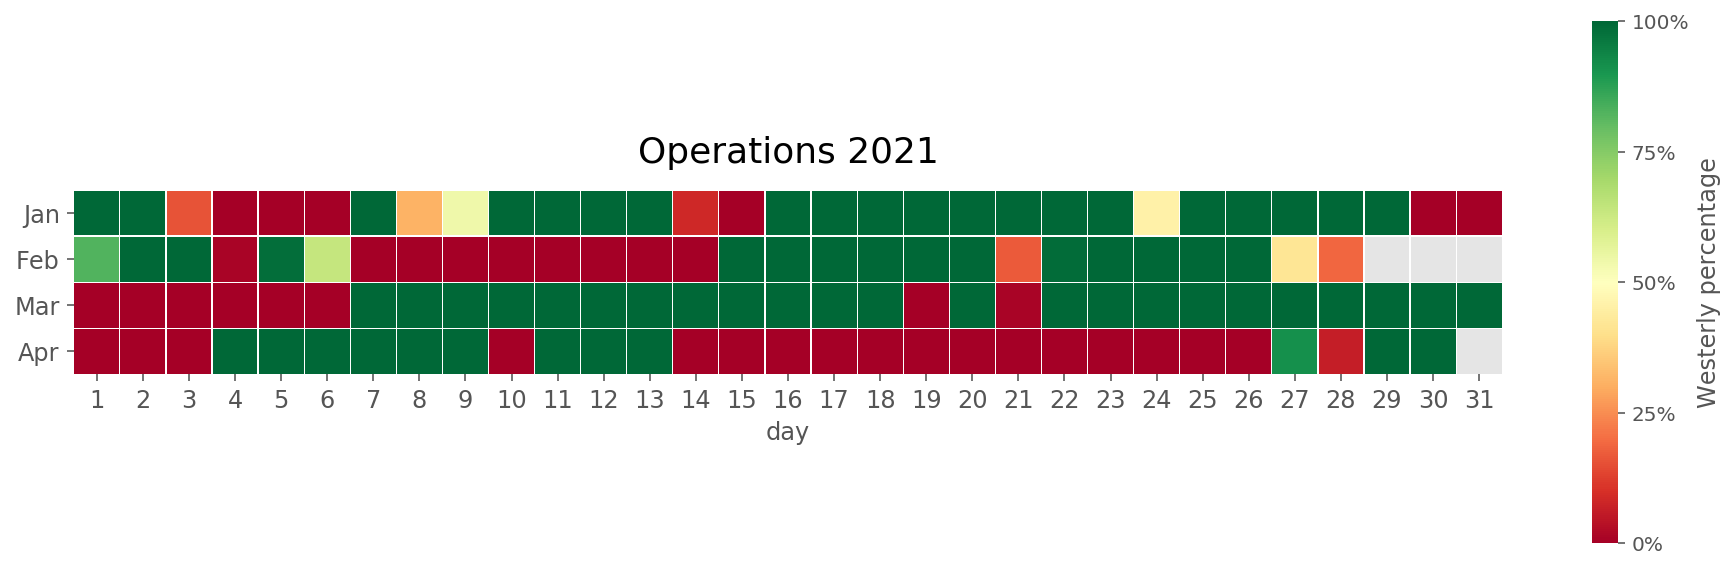

In [17]:
plot_heatmap_year(2021)

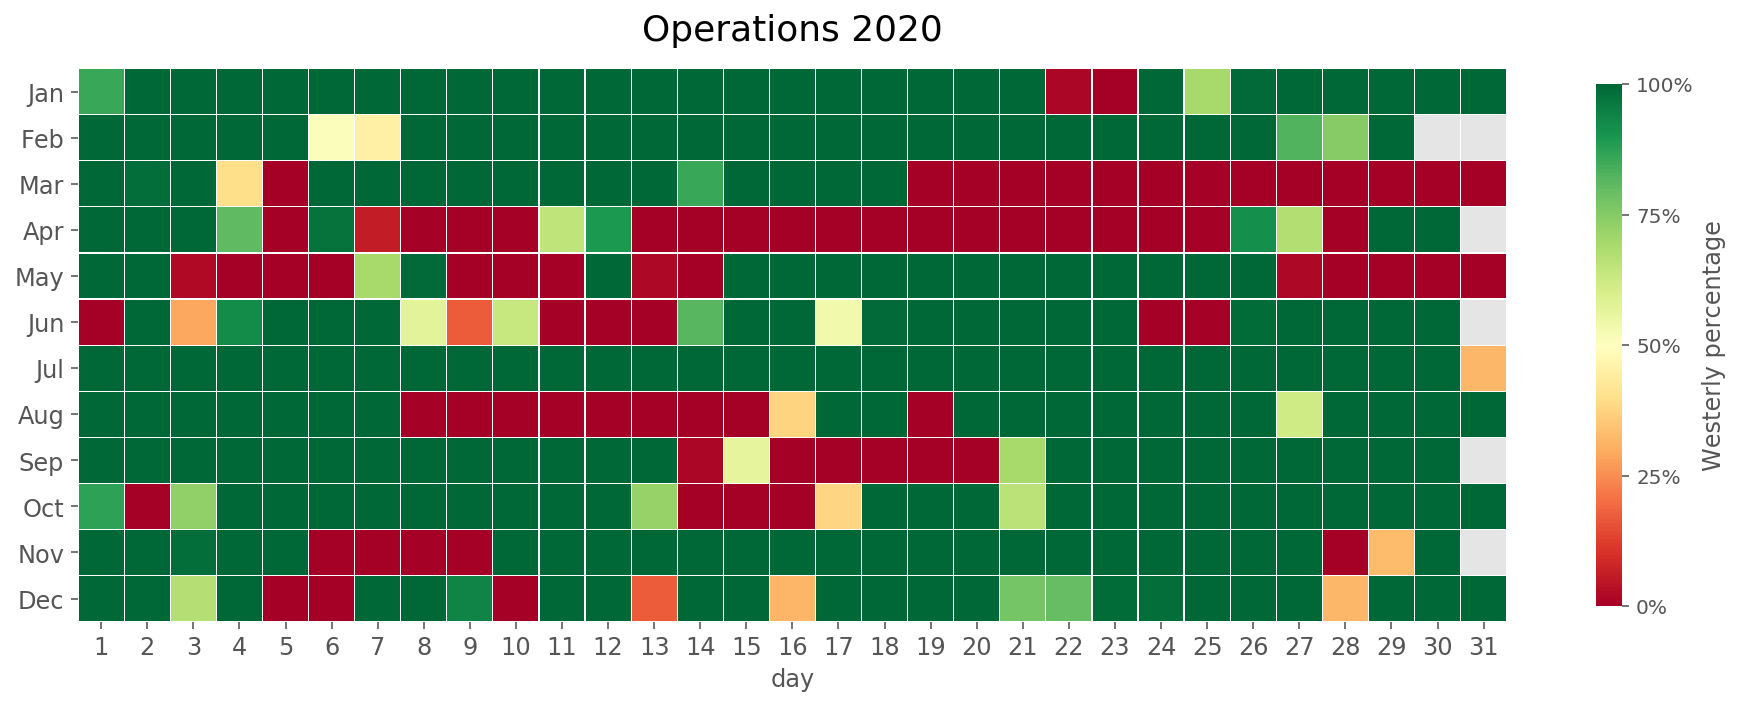

In [18]:
plot_heatmap_year(2020)

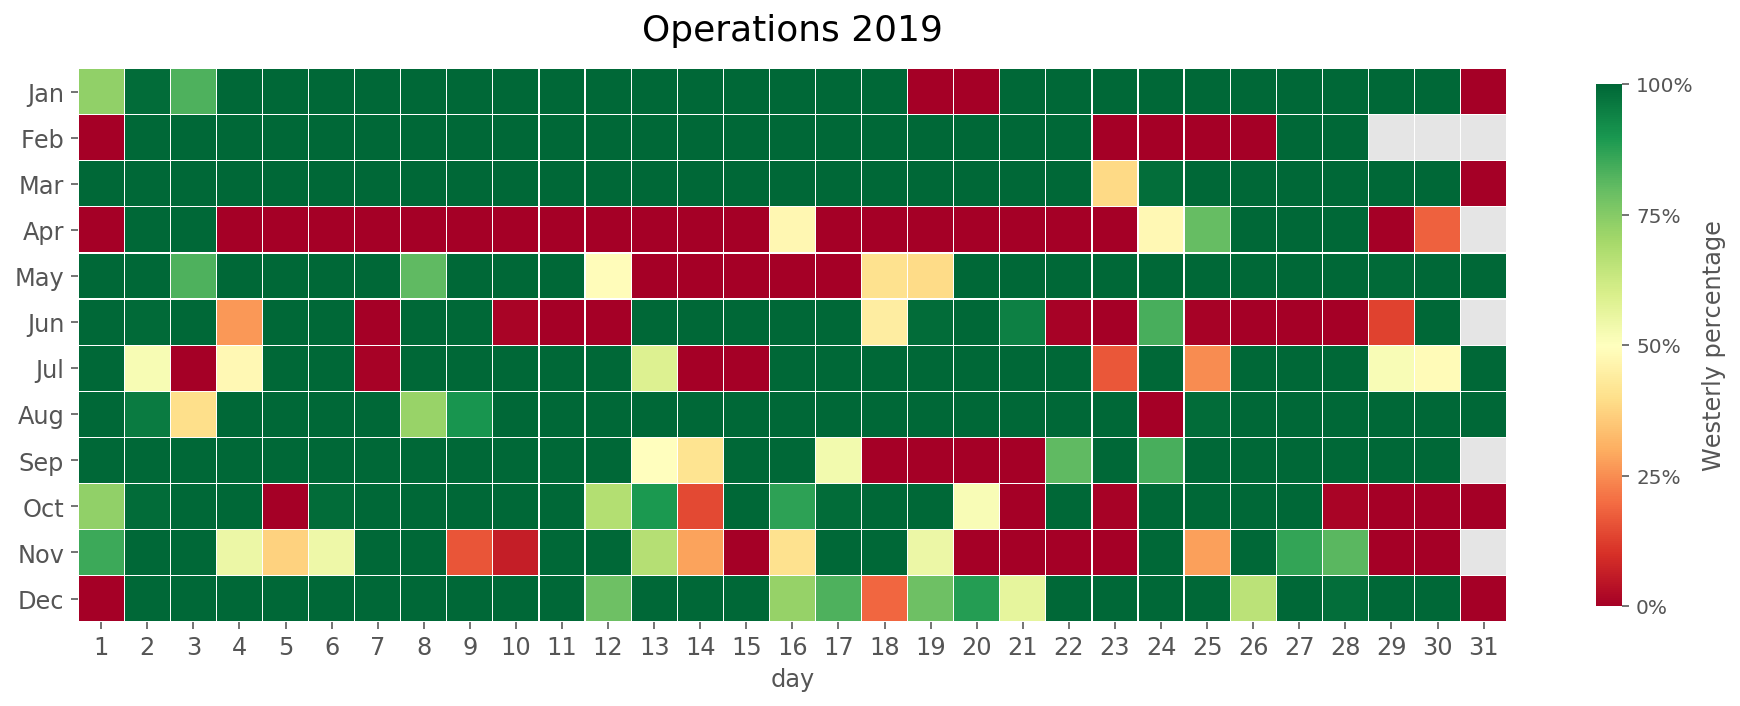

In [19]:
plot_heatmap_year(2019)

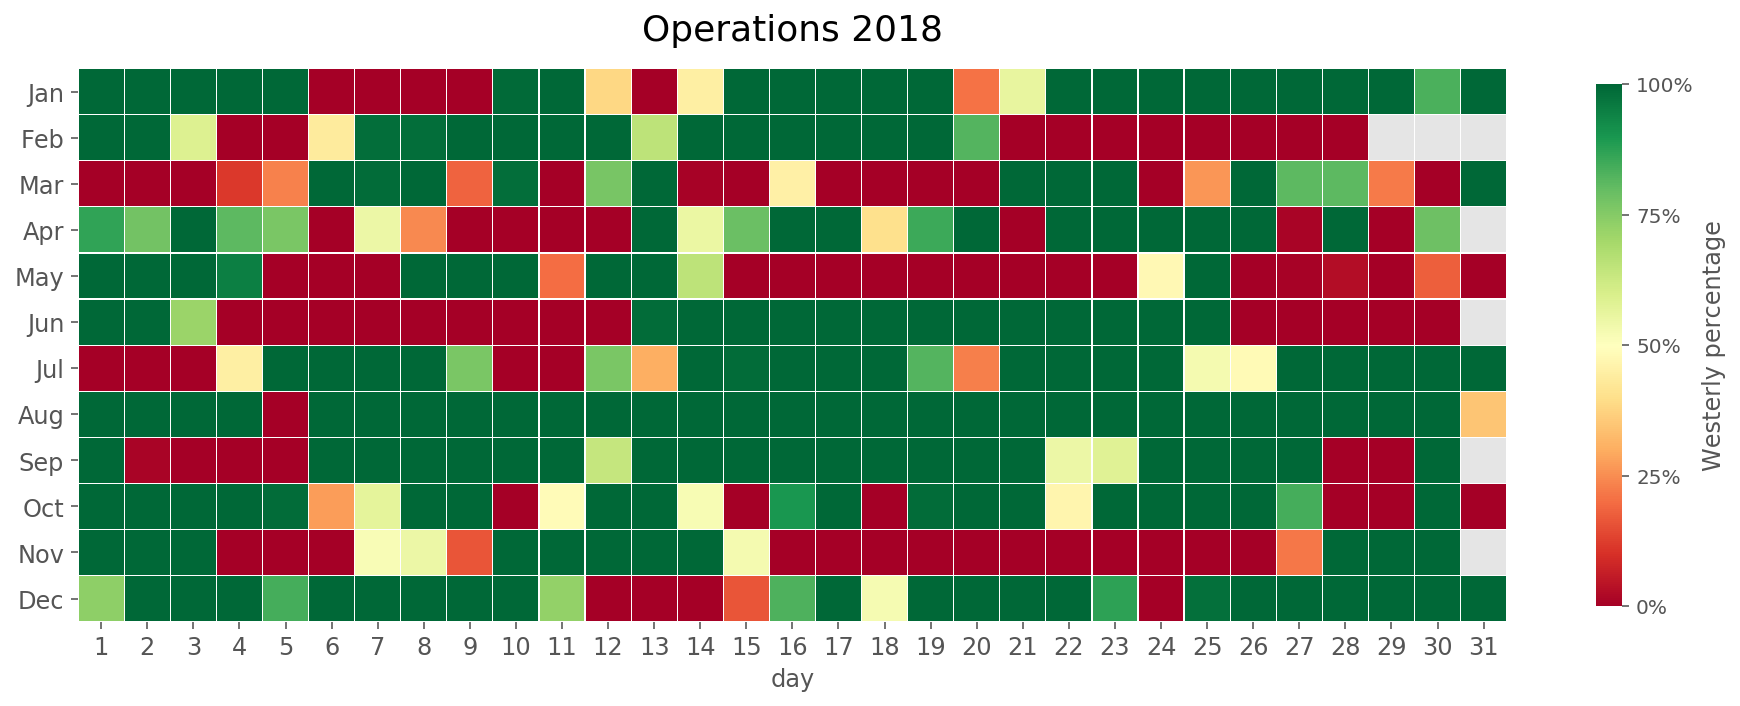

In [20]:
plot_heatmap_year(2018)

In [21]:
ops_days_average_df = operations_df.groupby([operations_df.month, operations_df.day])['westerly'].mean()
ops_days_average_df = ops_days_average_df.unstack()
ops_days_average_df = ops_days_average_df.set_index([[calendar.month_abbr[i] for i in list(ops_days_average_df.index)]])

In [22]:
ops_days_average_df

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Jan,0.797500,0.883500,0.773100,0.824300,0.900000,0.767300,0.890500,0.796800,0.840800,0.999500,...,0.657300,0.764400,0.762400,0.820400,0.899500,0.900000,0.854500,0.768600,0.639800,0.600100
Feb,0.781100,0.845300,0.611700,0.626700,0.691500,0.681600,0.643700,0.713400,0.746400,0.501500,...,0.798900,0.700000,0.699800,0.701200,0.600000,0.624700,0.499500,0.788333,NaN,NaN
Mar,0.700000,0.599300,0.546100,0.651700,0.623200,0.800000,0.890800,0.799900,0.784200,0.647500,...,0.538300,0.637200,0.424600,0.426400,0.500000,0.481200,0.581100,0.621900,0.578400,0.549700
Apr,0.621100,0.637200,0.628200,0.602900,0.498900,0.642600,0.572000,0.524400,0.500000,0.376900,...,0.453300,0.332800,0.742800,0.620200,0.752600,0.641200,0.559300,0.555900,0.597600,NaN
May,0.564333,0.526889,0.559444,0.608222,0.333556,0.444444,0.573556,0.649667,0.666667,0.666667,...,0.758889,0.679889,0.595111,0.660000,0.507556,0.529111,0.531556,0.500778,0.601556,0.776444
Jun,0.690889,0.864222,0.556333,0.351333,0.515222,0.555667,0.544556,0.585111,0.428556,0.323333,...,0.778556,0.846556,0.852222,0.667222,0.614111,0.666667,0.645222,0.759222,0.667444,NaN
Jul,0.689556,0.835111,0.666667,0.880444,0.831556,0.868222,0.668222,0.874444,0.863111,0.746778,...,0.830556,0.795000,0.777778,0.740444,0.713222,0.896889,0.889000,0.946333,0.942889,0.924444
Aug,0.886111,0.888778,0.933444,0.999444,0.874556,0.986556,0.887000,0.743889,0.826000,0.784222,...,0.726111,0.839556,0.667889,0.710222,0.813889,0.723222,0.999111,1.000000,0.888889,0.878333
Sep,1.000000,0.778778,0.666667,0.648556,0.715778,0.999556,0.831667,0.888889,0.837000,0.777778,...,0.800778,0.789556,0.826778,0.878889,0.667667,0.646111,0.587778,0.666667,0.777778,NaN
Oct,0.733889,0.665778,0.748222,0.838000,0.680444,0.618111,0.822444,0.745778,0.713000,0.555556,...,0.718333,0.667333,0.699222,0.831667,0.777778,0.810222,0.779000,0.597000,0.665333,0.555556


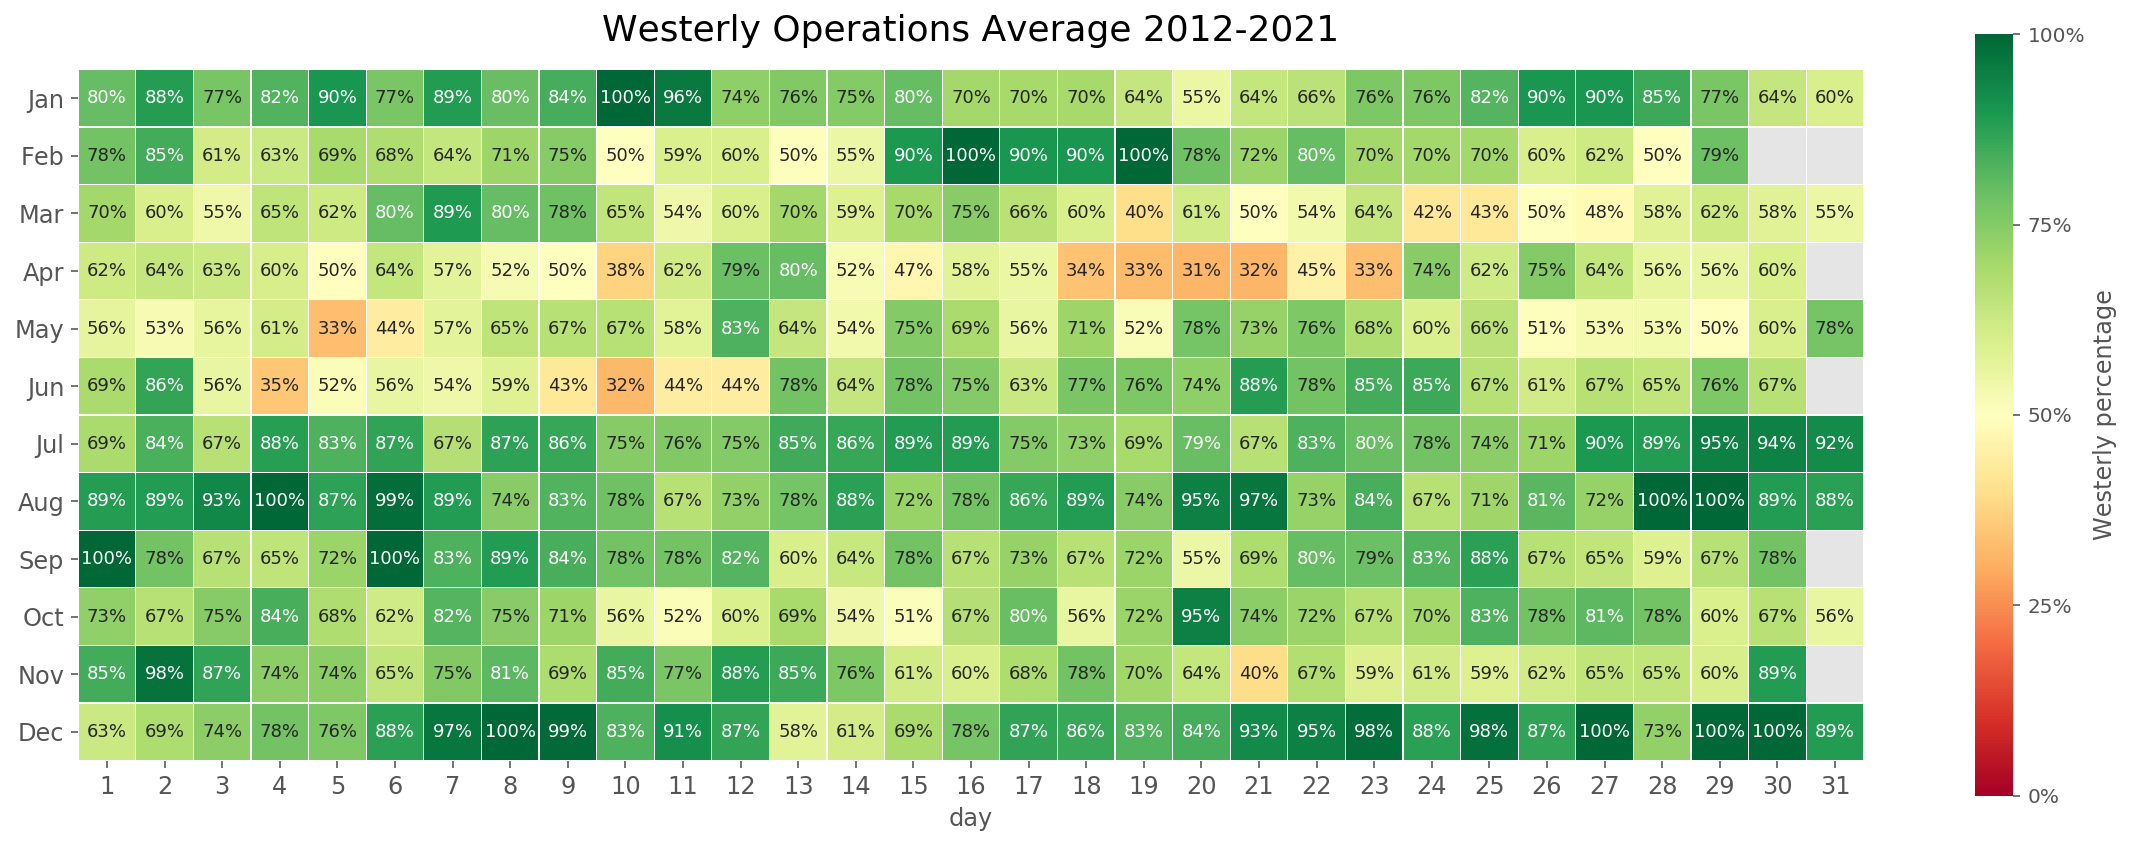

In [23]:
plt.figure(figsize = (20, 14))
ax = sns.heatmap(ops_days_average_df, cmap = 'RdYlGn', annot=True, fmt='.0%', vmin=0, vmax=1, linewidths=.1, annot_kws={"size": 9}, square=True, cbar_kws={"shrink": .5, 'label': 'Westerly percentage'})
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 12)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, fontsize = 12)
ax.tick_params(rotation = 0)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0, .25, .50,.75, 1])
cbar.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])
_ = plt.title(f'Westerly Operations Average 2012-2021', fontdict={'fontsize':18}, pad=14)

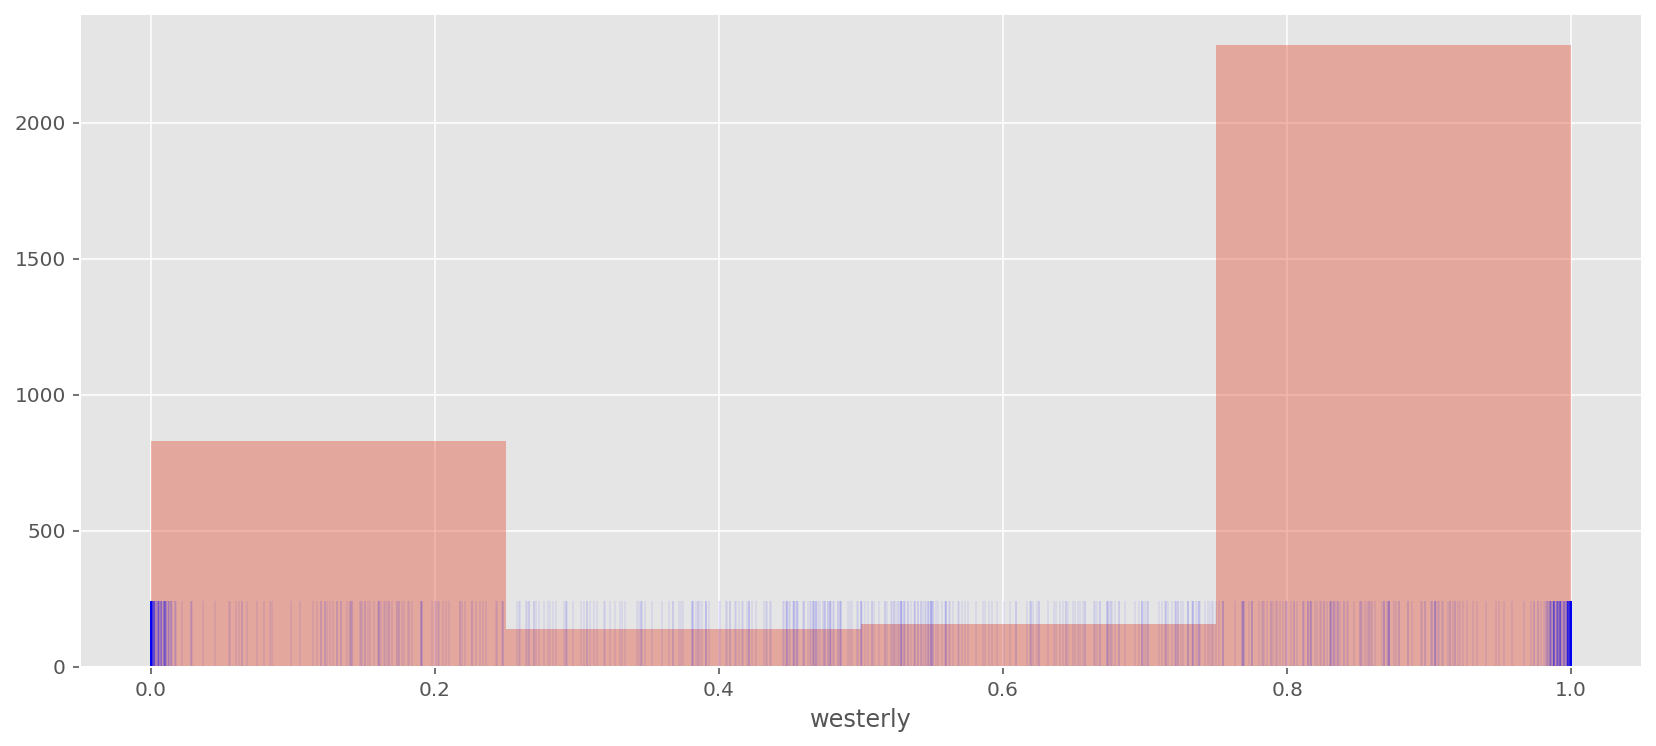

In [24]:
plt.figure(figsize = (14, 6))
_ = sns.distplot(operations_df['westerly'], kde=False, rug=True, bins = 4, rug_kws={"color": "b", "alpha":0.06, "linewidth": 1, "height":0.1 }
)

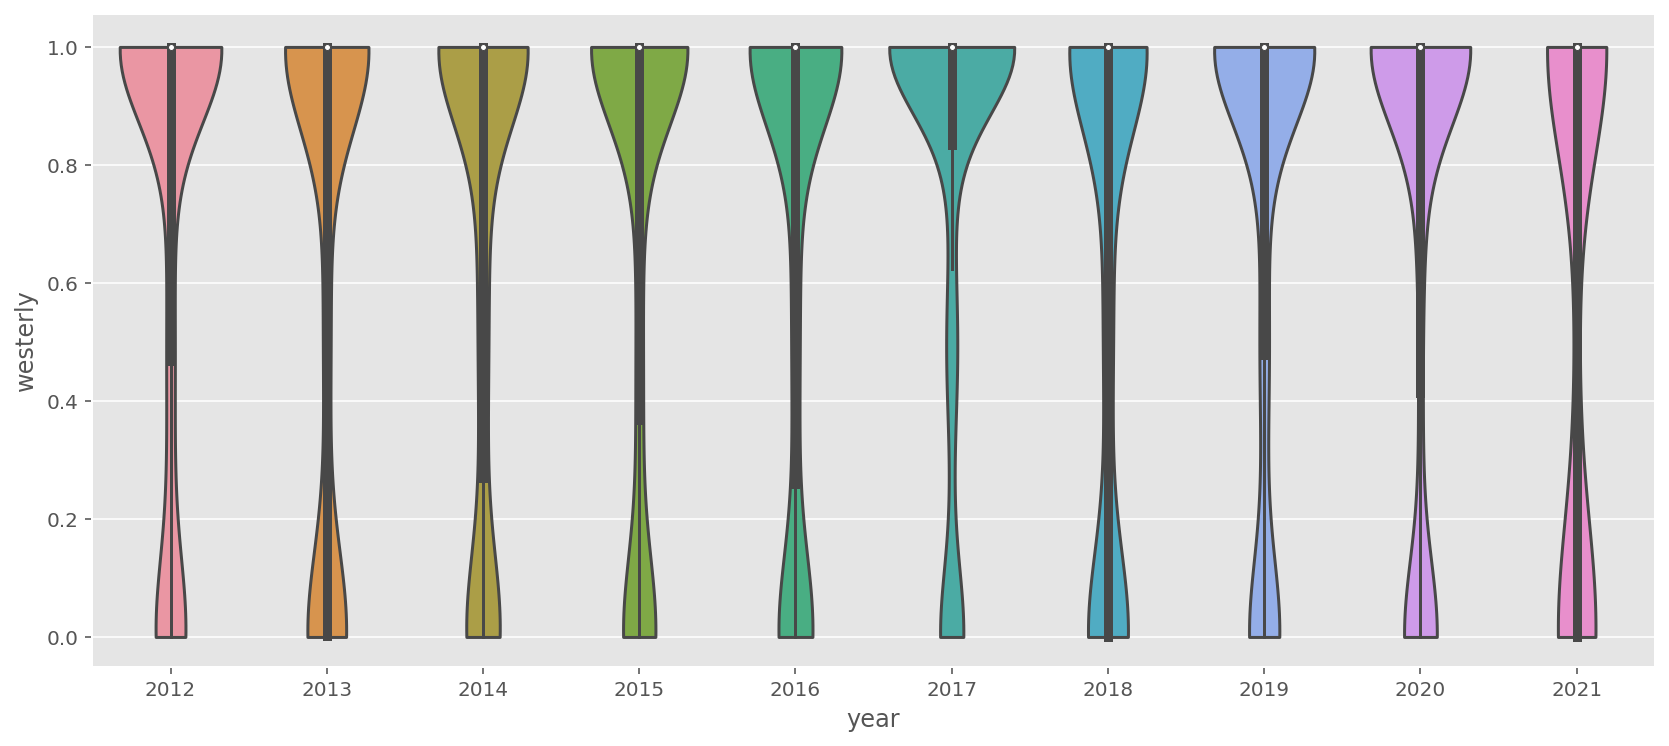

In [25]:
plt.figure(figsize = (14, 6))
_ = sns.violinplot(x="year", y="westerly",cut=0, data=operations_df)

In [26]:
operations_df['westTolerance'] = operations_df['westerly'].apply(lambda x: round(x))
daysCountWDf = operations_df.groupby('year')['westTolerance'].sum()
daysCountWDf = daysCountWDf.reset_index()
operations_df['eastTolerance'] = operations_df['easterly'].apply(lambda x: round(x))
daysCountEDf = operations_df.groupby('year')['eastTolerance'].sum()
daysCountEDf = daysCountEDf.reset_index()
daysCount = daysCountWDf.merge(daysCountEDf)
daysCount.columns = ['year', 'Westerly', 'Easterly']

In [27]:
daysCount

,year,Westerly,Easterly
0,2012,269,97
1,2013,244,119
2,2014,255,109
3,2015,263,102
4,2016,258,108
5,2017,296,69
6,2018,237,128
7,2019,270,95
8,2020,273,93
9,2021,72,48


In [28]:
daysCount = pd.melt(daysCount, id_vars=['year'], value_vars=['Westerly', 'Easterly'],
...         var_name='operations', value_name='days')

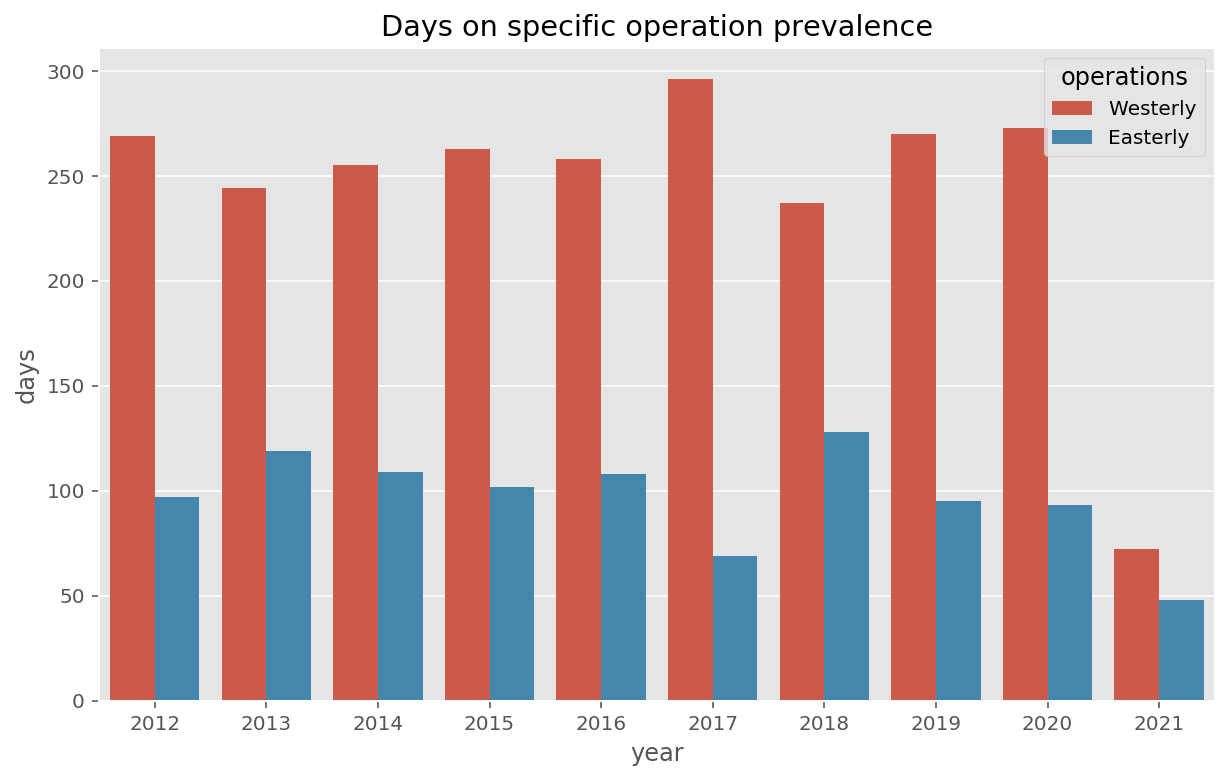

In [29]:
ax = sns.barplot(x="year", y='days', hue="operations", data=daysCount.sort_values(by='year'))
_ = ax.set_title("Days on specific operation prevalence")

In [30]:
operations_df['value_grp'] = (operations_df['westerly'].diff(1) != 0).astype('int').cumsum()
groupedValue = operations_df.groupby('value_grp')
consecutive_df = pd.DataFrame({'BeginDate' : groupedValue.date.first(), 
              'EndDate' : groupedValue.date.last(),
              'Consecutive' : groupedValue.size(),
              'ops': groupedValue.westerly.mean() }).reset_index(drop=True)
consecutive_df['ops'].replace({0: 'Easterly', 1: 'Westerly'}, inplace=True)
consecutive_df = consecutive_df[(consecutive_df.ops == 'Westerly') | (consecutive_df.ops == 'Easterly')]
consecutive_df.sort_values(by='Consecutive', ascending=False).head(30)

,BeginDate,EndDate,Consecutive,ops
1258,2020-06-27,2020-07-30,34,Westerly
615,2015-11-05,2015-12-06,32,Westerly
981,2018-08-06,2018-08-30,25,Westerly
690,2016-06-24,2016-07-18,25,Westerly
693,2016-07-21,2016-08-13,24,Westerly
1052,2019-02-27,2019-03-21,23,Westerly
479,2014-12-05,2014-12-25,21,Westerly
501,2015-02-16,2015-03-08,21,Westerly
195,2013-03-21,2013-04-09,20,Easterly
1198,2020-01-02,2020-01-21,20,Westerly


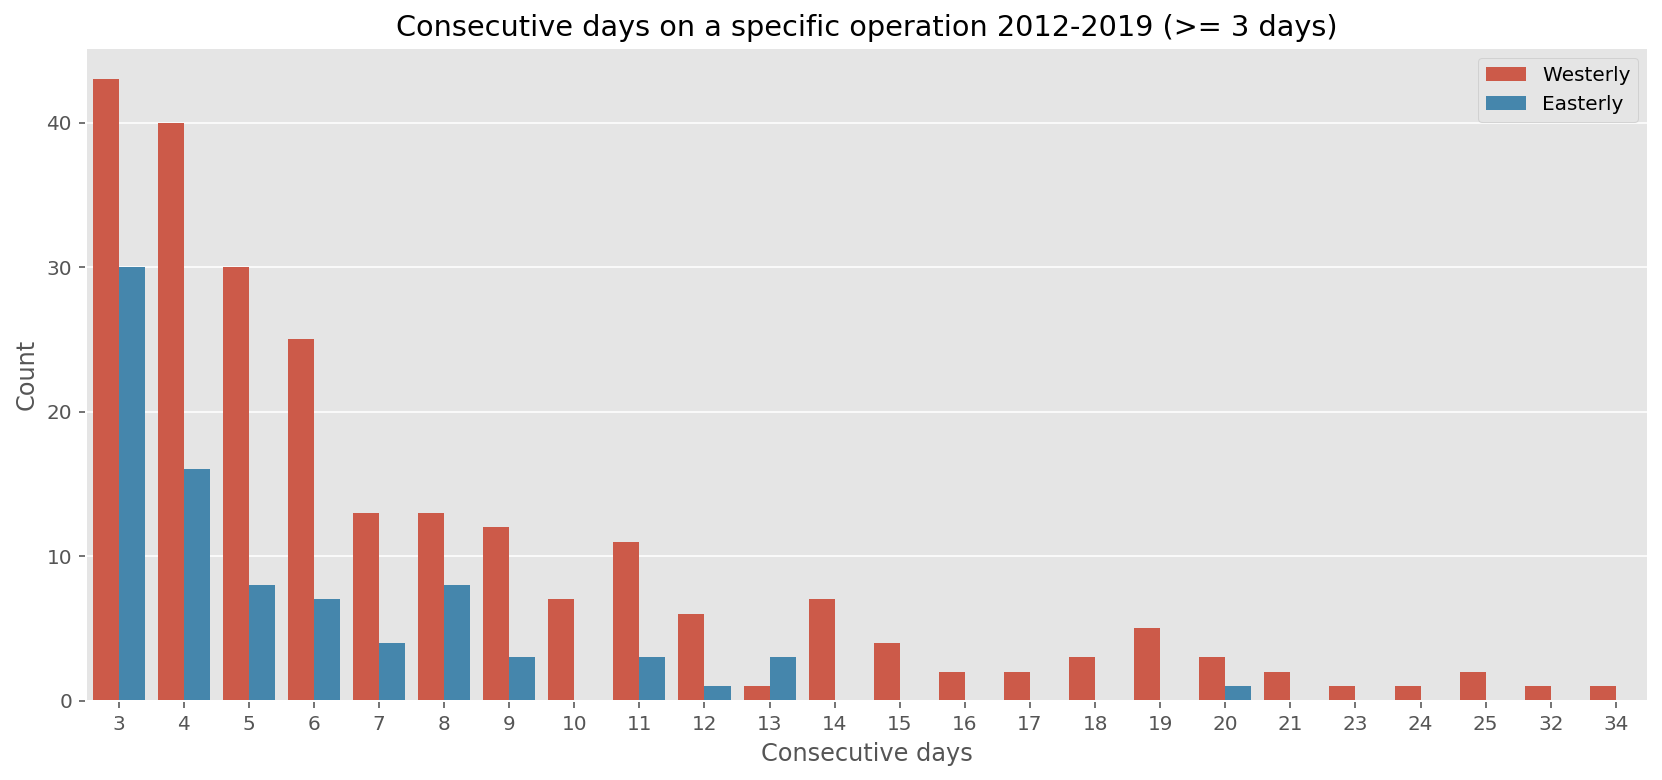

In [31]:
plt.figure(figsize = (14, 6))
ax = sns.countplot(x="Consecutive", hue="ops", data=consecutive_df.query('Consecutive >= 3'))
ax.set_title("Consecutive days on a specific operation 2012-2019 (>= 3 days)")
ax.set(xlabel='Consecutive days', ylabel='Count')
_ = plt.legend(loc='upper right')


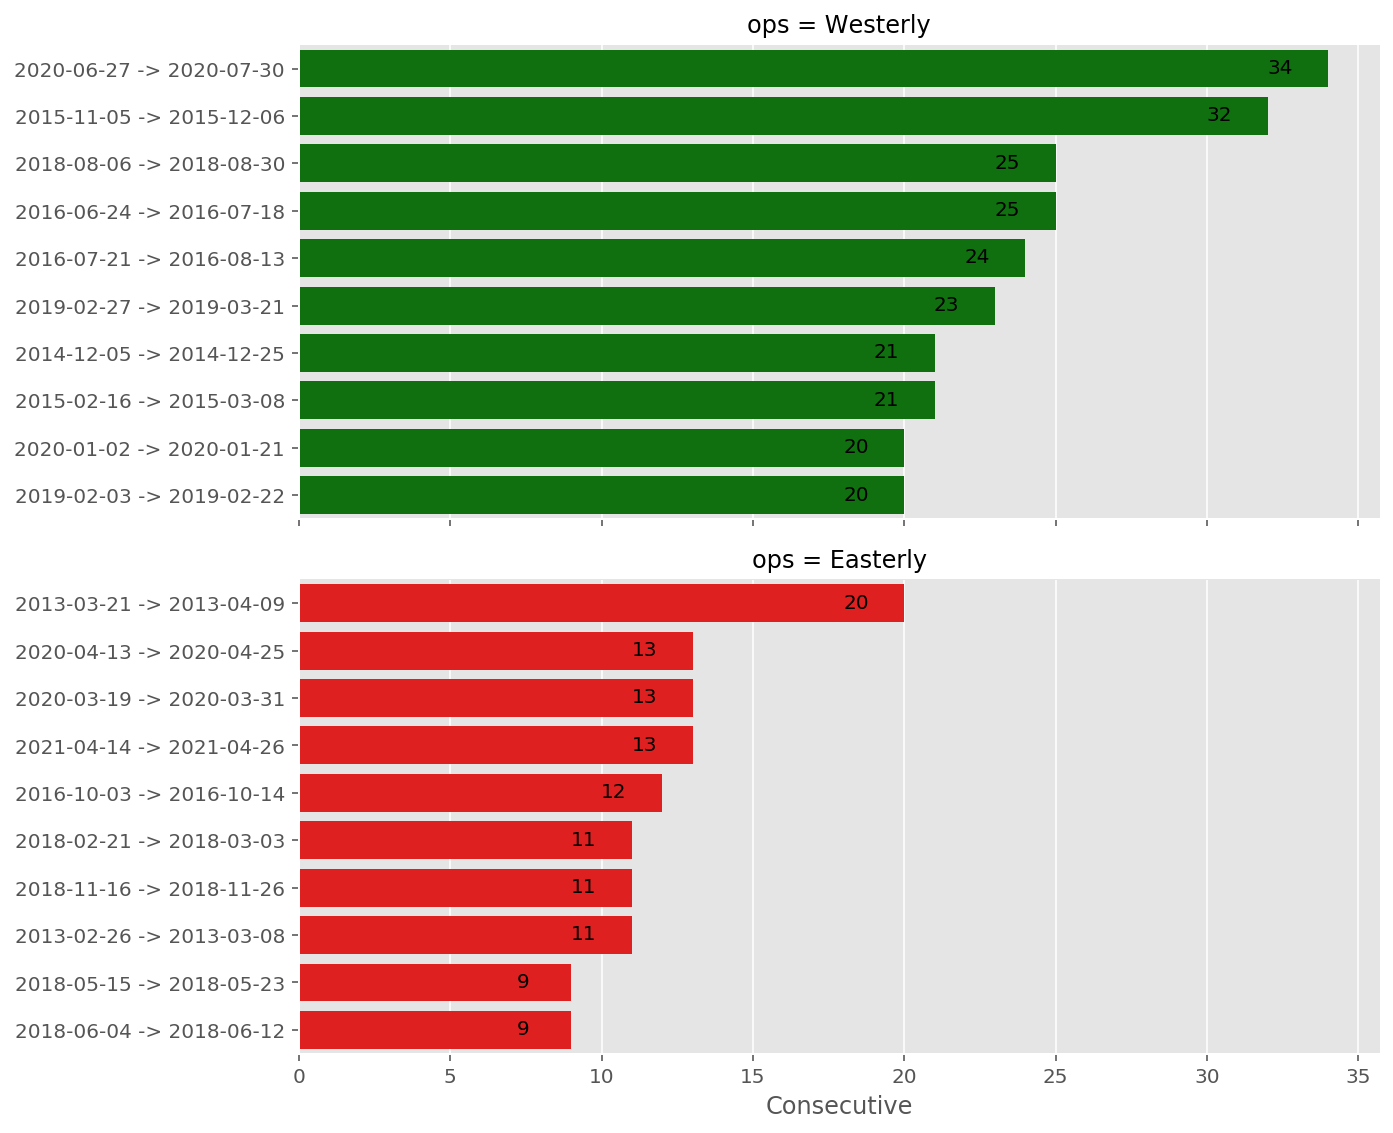

In [32]:
consecutive_df['DateRange'] = consecutive_df["BeginDate"].astype(str) + ' -> ' + consecutive_df["EndDate"].astype(str)
df_top10_per_condition = consecutive_df.sort_values(by='Consecutive',ascending = False).groupby('ops').head(10)

d = {'color': ['g', 'r']}
g = sns.FacetGrid(df_top10_per_condition, row="ops",
                      hue='ops',
                      hue_kws=d,
                      sharey=False)

g.fig.set_figheight(8)
g.fig.set_figwidth(10)
    
_ = g.map(sns.barplot, "Consecutive", "DateRange")
_ = g.set(ylabel='')

for ax in g.axes.flat:
 for p in ax.patches:
  width = p.get_width()
  ax.text(width -1.6, p.get_y() + p.get_height()/2. + 0.1,'{:1.0f}'.format(width), ha="center")

In [33]:
opPerMonth = operations_df.groupby(['month', 'year']).mean()['westerly'].reset_index()

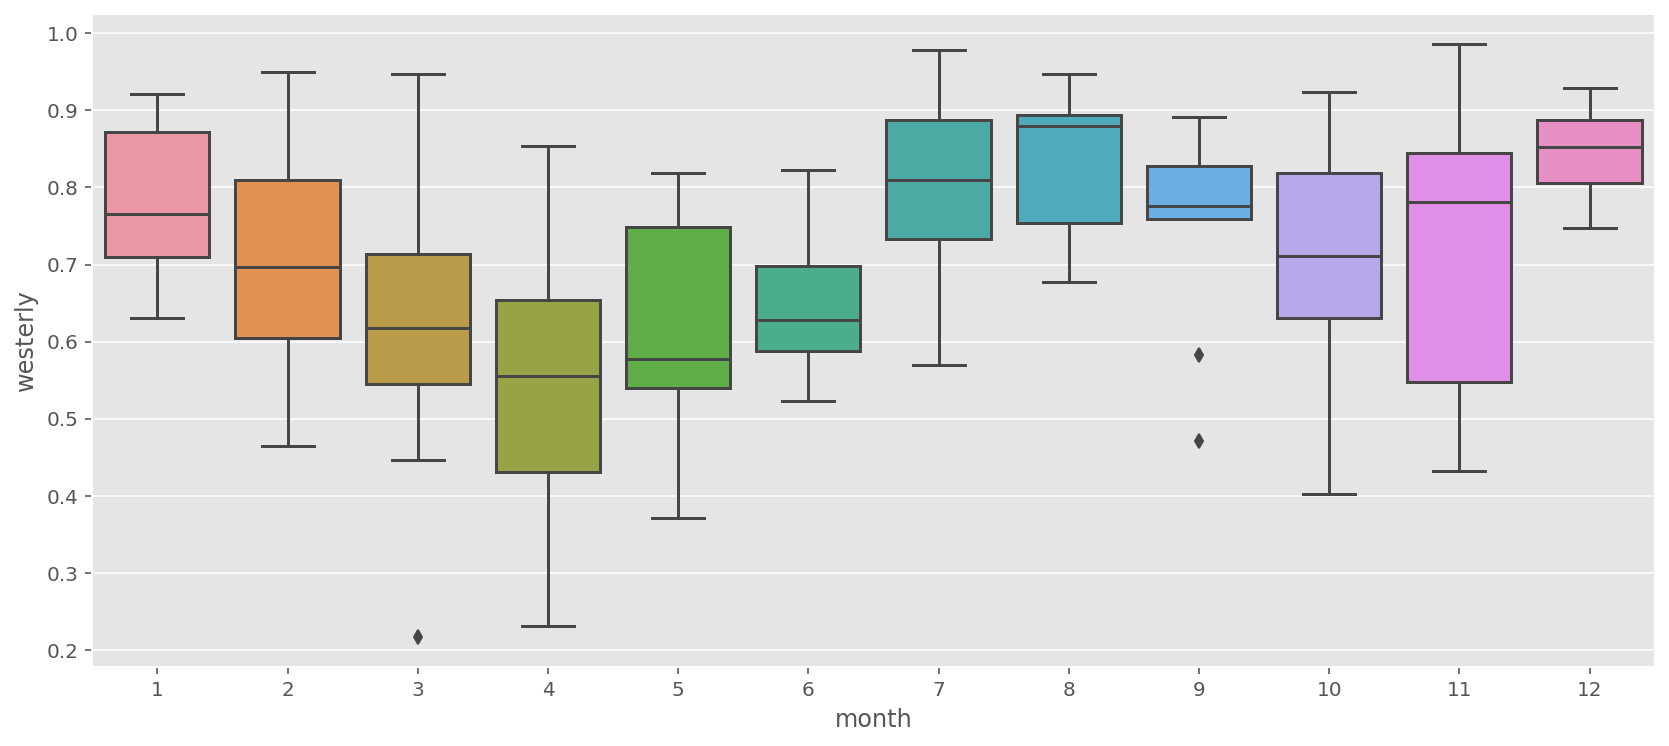

In [34]:
plt.figure(figsize = (14, 6))
ax = sns.boxplot(x="month", y="westerly", data=opPerMonth)